# 前言

**本文参照特征工程这本书，完整地完成一套流程**

# 加载数据

In [2]:
import pandas as pd
import os

In [103]:
import warnings

warnings.filterwarnings('ignore')

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [118]:
# 准备进行网格搜索
# CV表示交叉验证 cross validation
from sklearn.model_selection import GridSearchCV  

In [153]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [175]:
import numpy as np

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '1. Titanic数据预处理.ipynb',
 'gender_submission.csv',
 'train.csv',
 '.git',
 'test.csv',
 '参照特征工程入门这本书.ipynb',
 '参考另一个.ipynb',
 'README.md']

In [5]:
train = pd.read_csv('train.csv')

In [7]:
test = pd.read_csv('test.csv')

# 数据预处理

这部分主要完成数据的缺失值填充

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

****
从这里可以看出 Age Cabin Embarked是有缺失值的

所以需要填充这些缺失值。但Cabin的缺失值太多，我们先丢弃这一列

In [11]:
train.drop('Cabin', axis=1, inplace=True)

Age 是定量数据

Embarked 是定类数据

- 定类数据用众数填充缺失值
- 定量数据用中位数或者平均数填充缺失值

In [13]:
train['Age'].fillna(train.Age.median(), inplace=True)
train['Embarked'].fillna(train.Embarked.mode()[0], inplace=True)

In [15]:
# abs可以发现缺失值填充完成
train.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [16]:
columns_list = train.columns.tolist()

In [17]:
columns_list

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

# 特征理解

## 特征等级说明

****
**这一部分主要是对数据类型进行理解，数据首先可以分成 定性数据和定量数据**

**定量数据：本质上是数值，描述一个特征的数量**

**定性数据：本质上是类别，描述一个特征的种类**
****

**定性数据：pclass，name，sex，ticked，pclass**

**定量数据：age，sibsp，parch，fare**
****

然而还可以继续进行分类，定性数据还可以分成：

- 定类等级
- 定序等级
- 定距等级
- 定比等级

定类等级：如性别，就是分成男性和女性

定序等级：pclass，虽然也是类别，但我们希望某些类别数值越大越好。如不喜欢，一般，喜欢三个层度

定距等级：主要是针对定量数据。但和定序数据类似。不仅可以对数据进行排序，还可以数据进行加减。如温度。这类数据要用直方图查看

定比等级：定比等级还可以进行乘除运算。

****
定类等级：survived，name，sex，ticked

定序等级：pclass

定距等级：sibsp，parch

定比等级：age，fare

## 特征等级的图像描述方法

**定距等级和定比等级可以用直方图来描述。不能用饼状图或者是条形图来描述**

**定类等级和定序等级可以使用条形图描述**

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

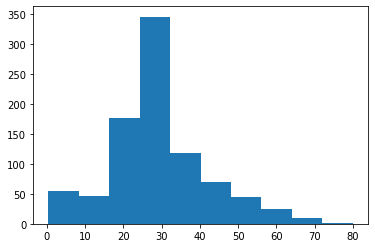

In [20]:
plt.hist(train.Age)

**数据形状类似于正太分布，其实只要数据大到一定层度。按统计学规律。是一定会呈现出正太分布的形式的**

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

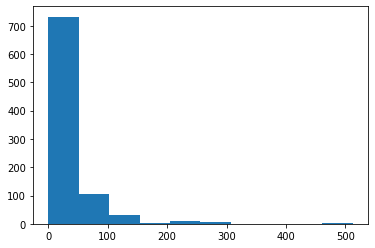

In [22]:
plt.hist(train.Fare)

**对定类数据使用条形图来观察**

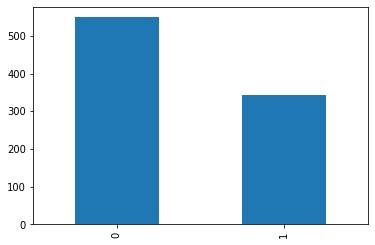

In [25]:
train.Survived.value_counts().plot(kind='bar')

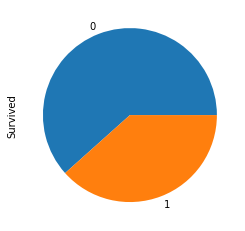

In [26]:
train.Survived.value_counts().plot(kind='pie')

# 特征增强

观察下Name和Ticket这两个特征。似乎都不能使用

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
train['Name'].nunique()

891

In [31]:
train['Ticket'].nunique()

681

In [34]:
train['New_name'] = train['Name'].str.extract(', (\w+).')

In [35]:
train.drop('Ticket', axis=1, inplace=True)

In [37]:
new_data_column = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'New_name']

In [38]:
new_data = train[new_data_column]

In [40]:
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_name
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [45]:
temp = new_data['New_name'].value_counts()

In [49]:
temp.loc['Mr']

517

In [53]:
new_data.loc[:,'New_name'] = new_data.loc[:,'New_name'].apply(
    lambda x:'Misc' if temp[x] < 10 else x
)

使用10作为分界线，否则认为出现的频率很低，因此归一类

In [54]:
new_data['New_name'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: New_name, dtype: int64

In [63]:
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_name
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


## 相关性分析

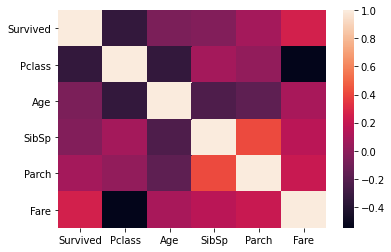

In [60]:
sns.heatmap(new_data.corr())

In [64]:
new_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'New_name'],
      dtype='object')

In [62]:
new_data.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

为什么少了这么多变量？不是还有性别和姓名这些属性吗。怎么没显示出来

这是因为这些数据都是字符串类型

In [68]:
# 将定类数据进行one hot编码。也就是哑变量
# 因为我们不希望这些分类数据有强度之分，也就是不喜欢，喜欢这样的差别
train1 = pd.get_dummies(new_data, columns=['Sex', 'Embarked', 'New_name'])
del new_data

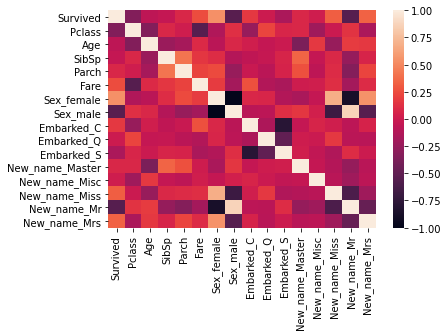

In [70]:
sns.heatmap(train1.corr())

In [76]:
# 进行排序好

train1.corr()['Survived'].sort_values(ascending=False)

Survived           1.000000
Sex_female         0.543351
New_name_Mrs       0.339040
New_name_Miss      0.327093
Fare               0.257307
Embarked_C         0.168240
New_name_Master    0.085221
Parch              0.081629
New_name_Misc      0.022030
Embarked_Q         0.003650
SibSp             -0.035322
Age               -0.064910
Embarked_S        -0.149683
Pclass            -0.338481
Sex_male          -0.543351
New_name_Mr       -0.549199
Name: Survived, dtype: float64

**从现在的相关性分析可以看出 相关系数小于正负0.1的似乎相关性都不高。到时候我们剔除这些特征再分析一下看下效果**

In [80]:
train1.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

假如我们全猜0的话，准确率也有0.6。这叫做空准确率。所以接下来的模型准确率。一定要高于这个数字

# 模型预测

接下来我们将初步利用上面的数据来训练模型，看下准确率

## 训练模型

In [96]:
MODEL = [
#     AdaBoostClassifier(), 
    RandomForestClassifier(), 
    LogisticRegressionCV(), 
    BernoulliNB(), 
    GaussianNB(), 
    SVC(), 
    DecisionTreeClassifier()
]

In [84]:
train1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,New_name_Master,New_name_Misc,New_name_Miss,New_name_Mr,New_name_Mrs
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,0,1,0


In [85]:
x, y = train1.drop('Survived', axis=1), train1['Survived']

In [109]:
# 查看内置的属性
dir(DecisionTreeClassifier())

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 'apply',
 'ccp_alpha',
 'class_weight',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impuri

In [108]:
DecisionTreeClassifier().__class__

sklearn.tree._classes.DecisionTreeClassifier

In [114]:
def modeling(model_list, x, y):
    d = {}
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2020)
    for model in model_list:
        model.fit(x_train, y_train)
        score = model.score(x_test, y_test)
#         print(f'{model.__class__} : {score}')
        d[model.__class__] = score # 获得属性的名字
    print(pd.Series(d).sort_values(ascending=False))

modeling(MODEL, x, y)

<class 'sklearn.linear_model._logistic.LogisticRegressionCV'>    0.825112
<class 'sklearn.ensemble._forest.RandomForestClassifier'>        0.816143
<class 'sklearn.naive_bayes.GaussianNB'>                         0.798206
<class 'sklearn.naive_bayes.BernoulliNB'>                        0.766816
<class 'sklearn.tree._classes.DecisionTreeClassifier'>           0.753363
<class 'sklearn.svm._classes.SVC'>                               0.632287
dtype: float64


**从上面的结果可以看出，逻辑回归和随机森林的效果似乎还不错。这还是在没有调节参数的情况下**

下面使用网格搜索进行调参

## 网格搜索

**TODO**

1. 上面不是进行了一些相关性分析吗，看看删除一些特征准确率的变化情况
2. 使用网格搜索，查找最佳参数，提升模型的准确度

In [116]:
# help(LogisticRegressionCV)

In [145]:
model_param_dict = {
# 'LogisticRegressionCV'
    0:{
    'penalty':['l1','l2','elasticnet'],
    'solver':['newton-cg', 'lbfgs','liblinear','sag','saga'],
    'class_weight':['balance',None],
#     'cv':[2,3,4],
},

# 'RandomForestClassifier'
    1:{
    'n_estimators':[90,100,110],
    'criterion':['gini','entropy'],
    'max_depth':[i for i in range(15)],
    'min_samples_split':[i for i in range(5)],
    'class_weight':['balanced', 'balanced_subsample'],
},

# GaussianNB_param = {}

# BernoulliNB_param = {   }

# 'DecisionTreeClassifier'
    2:{
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[i for i in range(5,15)],
    'min_samples_split':[i for i in range(5)],
#     'minz_samples_leaf':[i for i in range(5)],
    'max_features':['auto', 'sqrt', 'log2'],
    'class_weight':['balanced',None],
    
},
}

In [146]:
model_list = [
    LogisticRegressionCV(),
    RandomForestClassifier(), 
    DecisionTreeClassifier(),
]

for num, model in enumerate(model_list):
    gscv = GridSearchCV(model, param_grid=model_param_dict[num], cv=2, n_jobs=-1)
    gscv.fit(x_train,y_train)
    score = gscv.score(x_test,y_test)
    print(model)
    print(gscv.best_params_)
    print(score)
    print('-'*20)

LogisticRegressionCV()
{'class_weight': 'balance', 'penalty': 'l1', 'solver': 'liblinear'}
0.8251121076233184
--------------------
RandomForestClassifier()
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 4, 'n_estimators': 100}
0.820627802690583
--------------------
DecisionTreeClassifier()
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 4, 'splitter': 'random'}
0.7802690582959642
--------------------


除了第一种模型没有什么提升，其他的模型都有进步

# 提升模型

**接下来考虑创造一些特征，来提升模型的准确度。同时也会考虑模型融合**

In [124]:
model_param_dict[model]

KeyError: <class 'sklearn.ensemble._forest.RandomForestClassifier'>

## 尝试归一化

年龄和船票价格对其他变量的影响比较大。所以试一试将这两行数据进行归一化。看看模型的准确率有没有提升

In [147]:
train2 = train1.copy()

In [150]:
train2 is train1

# 这里注意和==的区别。is是判断两个变量指向的id是不是一样

False

In [151]:
train2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,New_name_Master,New_name_Misc,New_name_Miss,New_name_Mr,New_name_Mrs
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,0,1,0


In [169]:
min_max = MinMaxScaler()
min_max_data = pd.DataFrame(min_max.fit_transform(train2[['Age', 'Fare']]), columns=['Age_scaler', 'Fare_scaler'])

In [171]:
train2 = pd.concat([train2, min_max_data], axis=1).drop(['Age','Fare'], axis=1)

In [172]:
train2.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,New_name_Master,New_name_Misc,New_name_Miss,New_name_Mr,New_name_Mrs,Age_scaler,Fare_scaler
0,0,3,1,0,0,1,0,0,1,0,0,0,1,0,0.271174,0.014151
1,1,1,1,0,1,0,1,0,0,0,0,0,0,1,0.472229,0.139136
2,1,3,0,0,1,0,0,0,1,0,0,1,0,0,0.321438,0.015469
3,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0.434531,0.103644
4,0,3,0,0,0,1,0,0,1,0,0,0,1,0,0.434531,0.015713


In [173]:
x2, y2 = train2.drop('Survived', axis=1), train2['Survived']

In [174]:
def modeling(model_list, x, y):
    d = {}
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2020)
    for model in model_list:
        model.fit(x_train, y_train)
        score = model.score(x_test, y_test)
#         print(f'{model.__class__} : {score}')
        d[model.__class__] = score # 获得属性的名字
    print(pd.Series(d).sort_values(ascending=False))

modeling(MODEL, x2, y2)

<class 'sklearn.svm._classes.SVC'>                               0.834081
<class 'sklearn.linear_model._logistic.LogisticRegressionCV'>    0.807175
<class 'sklearn.ensemble._forest.RandomForestClassifier'>        0.807175
<class 'sklearn.naive_bayes.GaussianNB'>                         0.798206
<class 'sklearn.naive_bayes.BernoulliNB'>                        0.766816
<class 'sklearn.tree._classes.DecisionTreeClassifier'>           0.744395
dtype: float64


<class 'sklearn.linear_model._logistic.LogisticRegressionCV'>    0.825112

<class 'sklearn.ensemble._forest.RandomForestClassifier'>        0.816143

<class 'sklearn.naive_bayes.GaussianNB'>                         0.798206

<class 'sklearn.naive_bayes.BernoulliNB'>                        0.766816

<class 'sklearn.tree._classes.DecisionTreeClassifier'>           0.753363

<class 'sklearn.svm._classes.SVC'>                               0.632287

**数据进行归一化后，svm的效果更好点。变化很大。我们单独对svm进行网格搜索。看看模型上限是多少**

In [183]:
grid_param = {
    'C':np.linspace(0,2,20),
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[i for i in range(5)],
    'gamma':['scale', 'auto'],
}

In [179]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state=2020)

In [184]:
grid_search = GridSearchCV(SVC(), param_grid=grid_param, n_jobs=4)
grid_search.fit(x2_train, y2_train)
score = grid_search.score(x2_test, y2_test)
print(score)
print(grid_search.best_params_)

0.8395522388059702
{'C': 0.8421052631578947, 'degree': 0, 'gamma': 'scale', 'kernel': 'rbf'}


**模型精度只提升了一点点**

## 创建新的特征

TODO:

1. 尝试创建新的特征
2. 对年龄和票价进行分类处理。设置成定序等级